*Please include your name in the following statement as indication of code of honor agreement:*

**“I, Bahaa Kaaki, promise to conduct this work on my own without external help and without providing any help to others.”**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
SEED = 111

# Income Classification Dataset

This dataset collects in each row and individual's demographic record with the aim of predicting whether that person earns more or less than 50000 U.S.D. per year.

The collected variables are the following:
- age: the age of an individual
- workclass: employment status of an individual (*Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay Never­worked*)
- fnlwgt: final weight. This is the number of people the census believes the entry represents
- education: the highest level of education achieved by an individual (*Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool*)
- education­num: the highest level of education achieved in numerical form.
- marital­status: marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces. (*Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­spouse­absent, Married­AF­spouse*)
- occupation: the general type of occupation of an individual (*Tech­support, Craft­repair, Other­service, Sales, Exec­managerial, Prof­specialty Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces*)
- relationship: represents what this individual is relative to others. (*Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried*)
- race: Descriptions of an individual’s race (*White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black*)
- sex: the biological sex of the individual
- capital­gain: capital gains for an individual
- capital­loss: capital loss for an individual
- hours­per­week: the hours an individual has reported to work per week
- native­country: country of origin for an individual (*United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands*)
- the label: *<=50k, >50k*

*1) Load the dataset, show the type of variables, look for and deal with any missing values. Show a sample of the resulting dataset.*

<span style="color:cyan">
LOADING DATASET AND SHOWING TYPE OF VARIABLE
</span>

In [6]:
df = pd.read_csv('incomes.csv', index_col = 'Unnamed: 0')
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


<span style="color:cyan">
LOOKING FOR MISSING VALUES
</span>

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

<span style="color:cyan">
We can see that the columns 'workclass', 'occupation', and 'native_country' contain missing values (1836, 1843, 583 respectively).  
However, we wont use "df.dropna(axis=0, inplace=True)" since we have lots of data, it wouldn't be benfecial to drop all the rows since we will lose valuable information, we will try to replace the missing the data by propagate last valid observation forward to next valid, using 'fillna' with 'ffill' method.
</span>

In [8]:
df["workclass"].fillna(method="ffill", inplace=True)
df[ "occupation"].fillna(method="ffill", inplace=True)
df["native_country"].fillna(method="ffill", inplace=True)

In [68]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<span style="color:cyan">
Now we can see that there is no more missing values in any column of the dataset.
<span>

<span style="color:cyan">
Here, we are showing a sample of the resulting dataset, we can see that at index 61, we had previously a missing value in the workclass, and now it is 'Private' just like the value before it. 
<span>

In [9]:
df.head(64)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
62,48,Private,149640,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


# EDA

In the following questions use visualizations to back your answers.

Hint: an objective of some of these questions is to introduce countplots and using the Hue argument, check the Seaborn documentation to learn more.

*2) Show the distribution of the income. Is the dataset balanced?*

<AxesSubplot:xlabel='count', ylabel='income'>

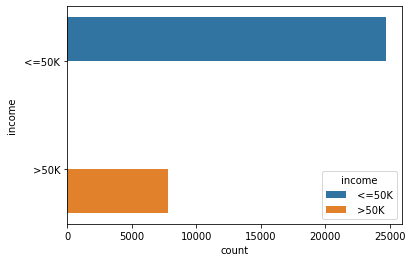

In [10]:
sns.countplot(data=df, y = 'income', hue = 'income')

<span style="color:cyan">
The data is not balanced since there is a lot more people ( > 20000) earning less than 50k and very few earning more than 50k (~ 7500)
</span>

*3) Is there any gender bias when it comes to income? What about racial bias?*

<AxesSubplot:xlabel='count', ylabel='income'>

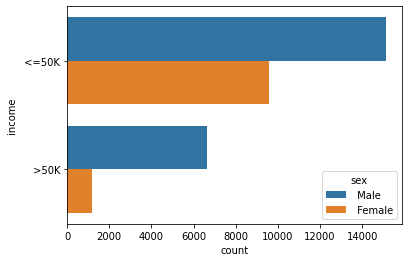

In [26]:
sns.countplot(data=df, y = 'income', hue = 'sex')

<span style="color:cyan">
When it comes to income, there is clearly a gender bias, in favor of males; It seen on the graph above since males dominate in income: 6000 males earning >50k compared to 1000 females, and 15000 males earning <=50k compared to 9000 females.
</span>

<AxesSubplot:xlabel='count', ylabel='income'>

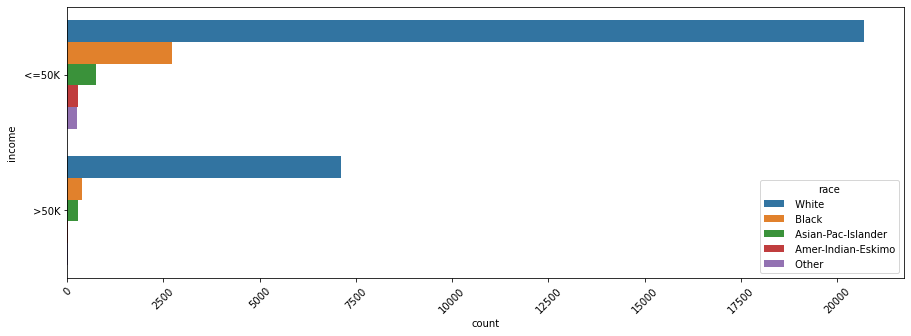

In [28]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=df, y = 'income', hue = 'race')

<span style="color:cyan">
And when it comes to income, there is also clearly a gender bias, in favor of white people: It is seen on the graph above where a huge proportion of whites earn <=50k (~20000) compared to oher ethnicities, ~3000 blacks, ~1000 asian-pac islander .... And ~7500 whites earn >50k compared to 500 blacks ...
</span>

*4) Do hardworking people earn more in general?*

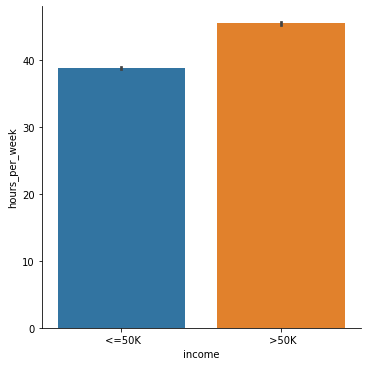

In [14]:
#df['hoursperweek'] = [hoursperweek]

sns.catplot(data=df, kind="bar", x="income", y="hours_per_week")

<span style="color:cyan">
yes, hardworking people earn more in general. This is interpreted from the graph above where the more hours per week are done, the higher the income becomes. For example, working ~40 hours per week results in an income of <= 50k while working ~45 hours per week results in an income >50k.
</span>

*5) Show the effect of educational level on income.*

<AxesSubplot:xlabel='count', ylabel='income'>

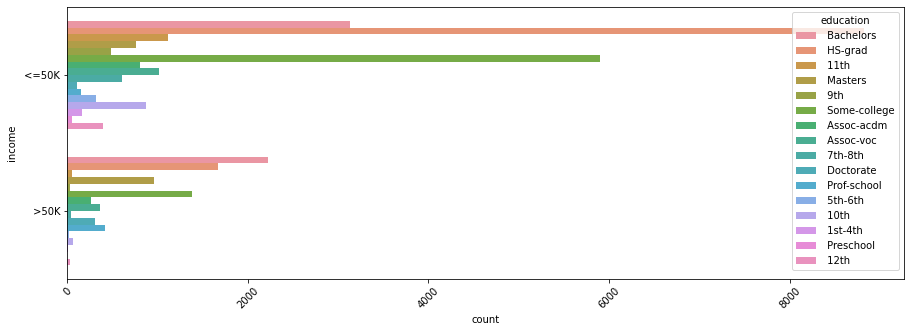

In [67]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=df, y = 'income', hue = 'education')

<span style="color:cyan">
Alternatively, highest level of education in numerical form:
</span>

<AxesSubplot:xlabel='count', ylabel='education_num'>

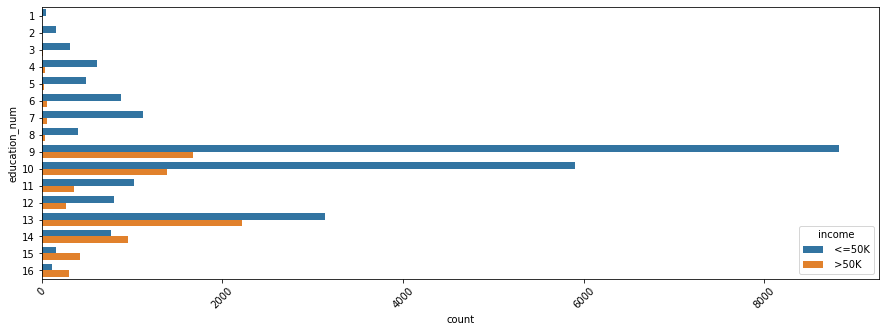

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=df, y = 'education_num', hue = 'income')

<span style="color:cyan">
It is noticed from the graphs above that having a bachelors or HS-grad is the most rewarding in terms of income <= 50k or >50k.
</span>

# Classification

*6) Prepare the data for training: encoding variables and data splitting.*

In [17]:
df_classification = pd.get_dummies(data = df, drop_first=True)
df_classification.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<span style="color:cyan">
Here, we don't need to scaling since we will be using Decision Trees and Random Forests
</span>

<span style="color:cyan">
Data Splitting:
<span>

In [18]:
X = df_classification.drop('income_ >50K', axis=1).values
y = df_classification.loc[:,'income_ >50K'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = SEED)

*7) Train a decision tree classifier. Show the training accuracy and F1-score. Show the testing accuracy, F1-score and confusion matrix.*
*Note: we've seen before that the dataset is not balanced. Therefore, we will rely on the F1-score rather than accuracy for model assessment.*

<span style="color:cyan">
Train a decision tree classifier
<span>

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = None, random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=111)

<span style="color:cyan">
Training accuracy
<span>

In [69]:
training_acc = dt.score(X_train, y_train)
print("Training accuracy: {:.10f}".format(training_acc))

Training accuracy: 0.9999616093


<span style="color:red">
Here we have a high training accuracy because we didnt specify a max_depth for the tree and it is overfitting the training data.
<span>

<span style="color:cyan">
Confusion Matrix
<span>

In [71]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

<span style="color:cyan">
Showing Confusion Matrix
<span>

<AxesSubplot:>

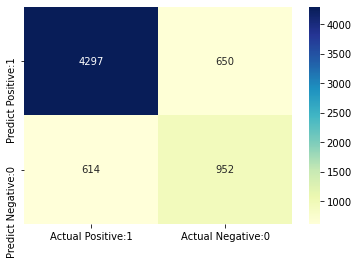

In [72]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<span style="color:coral">
source: 
https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance
<span>

<span style="color:cyan">
f1_score
<span>

In [73]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred)
print("f1_score: {:.10f}".format(f1_score))

f1_score: 0.6010101010


<span style="color:cyan">
Testing accuracy
<span>

In [74]:
from sklearn.metrics import accuracy_score

testing_acc = accuracy_score(y_pred, y_test)
print("Testing accuracy: {:.10f}".format(testing_acc))

Testing accuracy: 0.8059266083


*8) What are the hyperparameters of a decision tree?*

In [75]:
params_dt = dt.get_params()
params_dt

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 111,
 'splitter': 'best'}

*9) Use grid search to tune the following hyperparameters: criterion, max depth, max features. Use 10-fold cross-validation with the F1-score as the validation metric.*

*Show the optimal hyperparameters you obtain. Show the same performance metrics as above.*

<span style="color:cyan">
Grid search to tune the following hyperparameters: criterion, max depth, min_samples_leaf, max feature with 10-fold cross-validation with the F1-score
<span>

In [194]:
from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import cross_val_score

params_dt = {
    "criterion" : ['entropy', 'gini'], "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], "min_samples_leaf":  [1, 2, 4, 10, 30], "max_features": ['log2', 'auto', 'sqrt']
}

grid_dt = GridSearchCV(estimator= dt, param_grid= params_dt, scoring= "f1", cv= 10, verbose= 1, n_jobs= -1)
grid_dt.fit(X_train, y_train)

Fitting 10 folds for each of 330 candidates, totalling 3300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3300 out of 3300 | elapsed:  1.5min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 10, 30]},
             scoring='f1', verbose=1)

<span style="color:cyan">
Obtained optimal hyperparameters
<span>

In [195]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4}

<span style="color:cyan">
Train a decision tree classifier with obtained optimal hyperparameters
<span>

In [76]:
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, max_features = 'auto', min_samples_leaf= 4, random_state=SEED)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                       random_state=111)

<span style="color:cyan">
Training accuracy
<span>

In [77]:
training_acc_gini = dt_gini.score(X_train, y_train)
print("Training accuracy: {:.10f}".format(training_acc_gini))

Training accuracy: 0.8590294840


##

<span style="color:cyan">
Confusion Matrix
<span>

In [78]:
y_pred_gini = dt_gini.predict(X_test)
cm_gini = confusion_matrix(y_test, y_pred_gini)

<span style="color:cyan">
Showing Confusion Matrix
<span>

<AxesSubplot:>

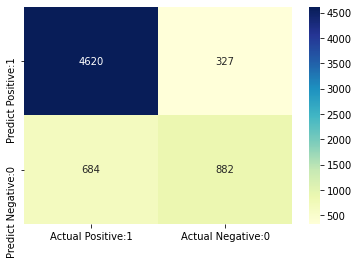

In [79]:
cm_matrix_gini = pd.DataFrame(data= cm_gini, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_gini, annot=True, fmt='d', cmap='YlGnBu')

<span style="color:cyan">
f1_score
<span>

In [80]:
from sklearn.metrics import f1_score

f1_score_gini = f1_score(y_test, y_pred_gini)
print("f1_score: {:.10f}".format(f1_score_gini))

f1_score: 0.6356756757


<span style="color:cyan">
Testing accuracy
<span>

In [81]:
testing_acc_gini = accuracy_score(y_pred_gini, y_test)
print("Testing accuracy: {:.10f}".format(testing_acc_gini))

Testing accuracy: 0.8447719945


*10) How are the previous model and the current model different? Comment on that difference.*

<span style="color:cyan">
The current model has higher f1 score (0.61 vs 0.63) than previous model and higher testing accuracy (0.8 vs 0.85) ----> Better performance. This is mainly due hyperparameter tuning we just did, which allowed a more optimized tree than without tuning. Furthermore, the confusion matrix diagonal values increased.
</span>

*11) Train a Random Forest classifier to perform the same task. Show the same evaluation metrics as above plus the OOB score.*

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = None, oob_score=True, random_state=SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=111)

<span style="color:cyan">
Training accuracy
<span>

In [83]:
training_acc_rf = rf.score(X_train, y_train)
print("Training accuracy: {:.10f}".format(training_acc_rf))

Training accuracy: 0.9998848280


<span style="color:red">
Here we have a high training accuracy because we didnt specify a max_depth for the random forest and it is overfitting the training data.
<span>

<span style="color:cyan">
Confusion Matrix
<span>

In [87]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

<span style="color:cyan">
Showing Confusion Matrix
<span>

<AxesSubplot:>

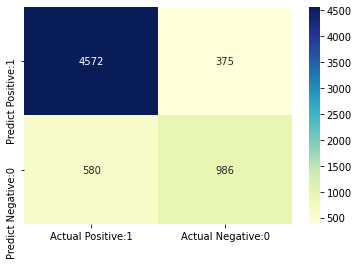

In [88]:
cm_matrix_rf = pd.DataFrame(data= cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')

<span style="color:cyan">
f1_score
<span>

In [89]:
from sklearn.metrics import f1_score

f1_score_rf = f1_score(y_test, y_pred_rf)
print("f1_score: {:.10f}".format(f1_score_rf))

f1_score: 0.6737273659


<span style="color:cyan">
Testing accuracy
<span>

In [90]:
testing_acc_rf = accuracy_score(y_pred_rf, y_test)
print("Testing accuracy: {:.10f}".format(testing_acc_rf))

Testing accuracy: 0.8533701827


<span style="color:cyan">
OOB Score
<span>

In [91]:
acc_oob_rf = rf.oob_score_
print("OOB Score: {:.10f}".format(acc_oob_rf))

OOB Score: 0.8510058354


*12) Compare its performance to that of the decision tree you tuned.*

<span style="color:cyan">
Random forest are better than tuned decision tree: better f1 score (0.67 vs 0.63) and we get a slightly better confusion matrix diagonal values (5502 vs 5558) ---> more robust ---> better performance.
</span>

*13) What are the hyperparameters of a random forest?*

In [52]:
params_rf = rf.get_params()
params_rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

*14) Tune the following hyperparameters: criterion, max depth, max features, max samples, n estimators. Use 3-fold cross-validation with the F1-score as the validation metric.*

*Show the optimal hyperparameters you obtain. Show the same performance metrics as above.*

In [56]:
from sklearn.model_selection import GridSearchCV 

params_rf = {
    "criterion" : ['entropy', 'gini'], "max_depth": [10, 20, 30, None],  "n_estimators" : [80, 100, 200, 500]
}

grid_rf = GridSearchCV(estimator= rf, param_grid= params_rf, scoring= "f1", cv= 3, verbose= 1, n_jobs= -1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=111),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [80, 100, 200, 500]},
             scoring='f1', verbose=1)

<span style="color:cyan">
Obtained optimal hyperparameters
<span>

In [57]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500}

<span style="color:cyan">
Train a random forest classifier with obtained optimal hyperparameters
<span>

In [92]:
rf_gini = RandomForestClassifier(criterion = 'gini', max_depth = 30,  n_estimators = 500, oob_score=True, random_state=SEED)
rf_gini.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, oob_score=True,
                       random_state=111)

<span style="color:cyan">
Training accuracy
<span>

In [93]:
training_acc_rf_gini = rf_gini.score(X_train, y_train)
print("Training accuracy: {:.10f}".format(training_acc_rf_gini))

Training accuracy: 0.9779253686


<span style="color:red">
Generally, "random forests aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results."
Here, the training accuracy is still high --->overfitting; but since we don't have powerful clouds to do the hyperparameters tuning for us, we are satisfied with what we will obtain.
<span>

<span style="color:coral">
"...": 
source: https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991#:~:text=But%20as%20stated%2C%20a%20random,a%20collection%20of%20decision%20trees.&text=With%20that%20said%2C%20random%20forests,and%20therefore%20yield%20useful%20results
<span>

<span style="color:cyan">
Confusion Matrix
<span>

In [94]:
y_pred_rf_gini = rf_gini.predict(X_test)
cm_rf_gini = confusion_matrix(y_test, y_pred_rf_gini)

<span style="color:cyan">
Showing Confusion Matrix
<span>

<AxesSubplot:>

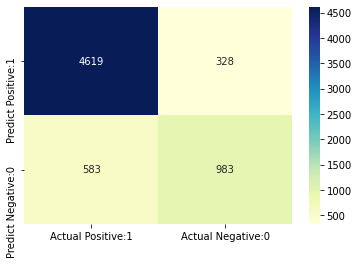

In [96]:
cm_matrix_rf_gini = pd.DataFrame(data= cm_rf_gini, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rf_gini, annot=True, fmt='d', cmap='YlGnBu')

<span style="color:cyan">
f1_score
<span>

In [97]:
from sklearn.metrics import f1_score

f1_score_rf_gini = f1_score(y_test, y_pred_rf_gini)
print("f1_score: {:.10f}".format(f1_score_rf_gini))

f1_score: 0.6833507125


<span style="color:cyan">
Testing accuracy
<span>

In [98]:
testing_acc_rf_gini = accuracy_score(y_pred_rf_gini, y_test)
print("Testing accuracy: {:.10f}".format(testing_acc_rf_gini))

Testing accuracy: 0.8601259020


<span style="color:cyan">
OOB Score
<span>

In [101]:
acc_oob_rf_gini = rf_gini.oob_score_
print("OOB Score: {:.10f}".format(acc_oob_rf_gini))

OOB Score: 0.8593366093


*16) Comment on the differences in performance after cross-validating and tuning. What are the disadvantages of this hyperparameter search methodology?*

<span style="color:cyan">
After cross validation and tuning, we obtain better f1 score, testing accuracy and OOB score (0.67, 0.85, 0.85 vs 0.68, 0.86, 0.86) ---> better performance, but the search for the hyperparameters was resourcefully exhausting due to extensive computations.
</span>

*17) Random forests are widely used for their ability to learn the feature importance or impact in the application domain. Sort and plot the feature importance learned by the tuned random forest.* 

## There is still info under the graph !!!

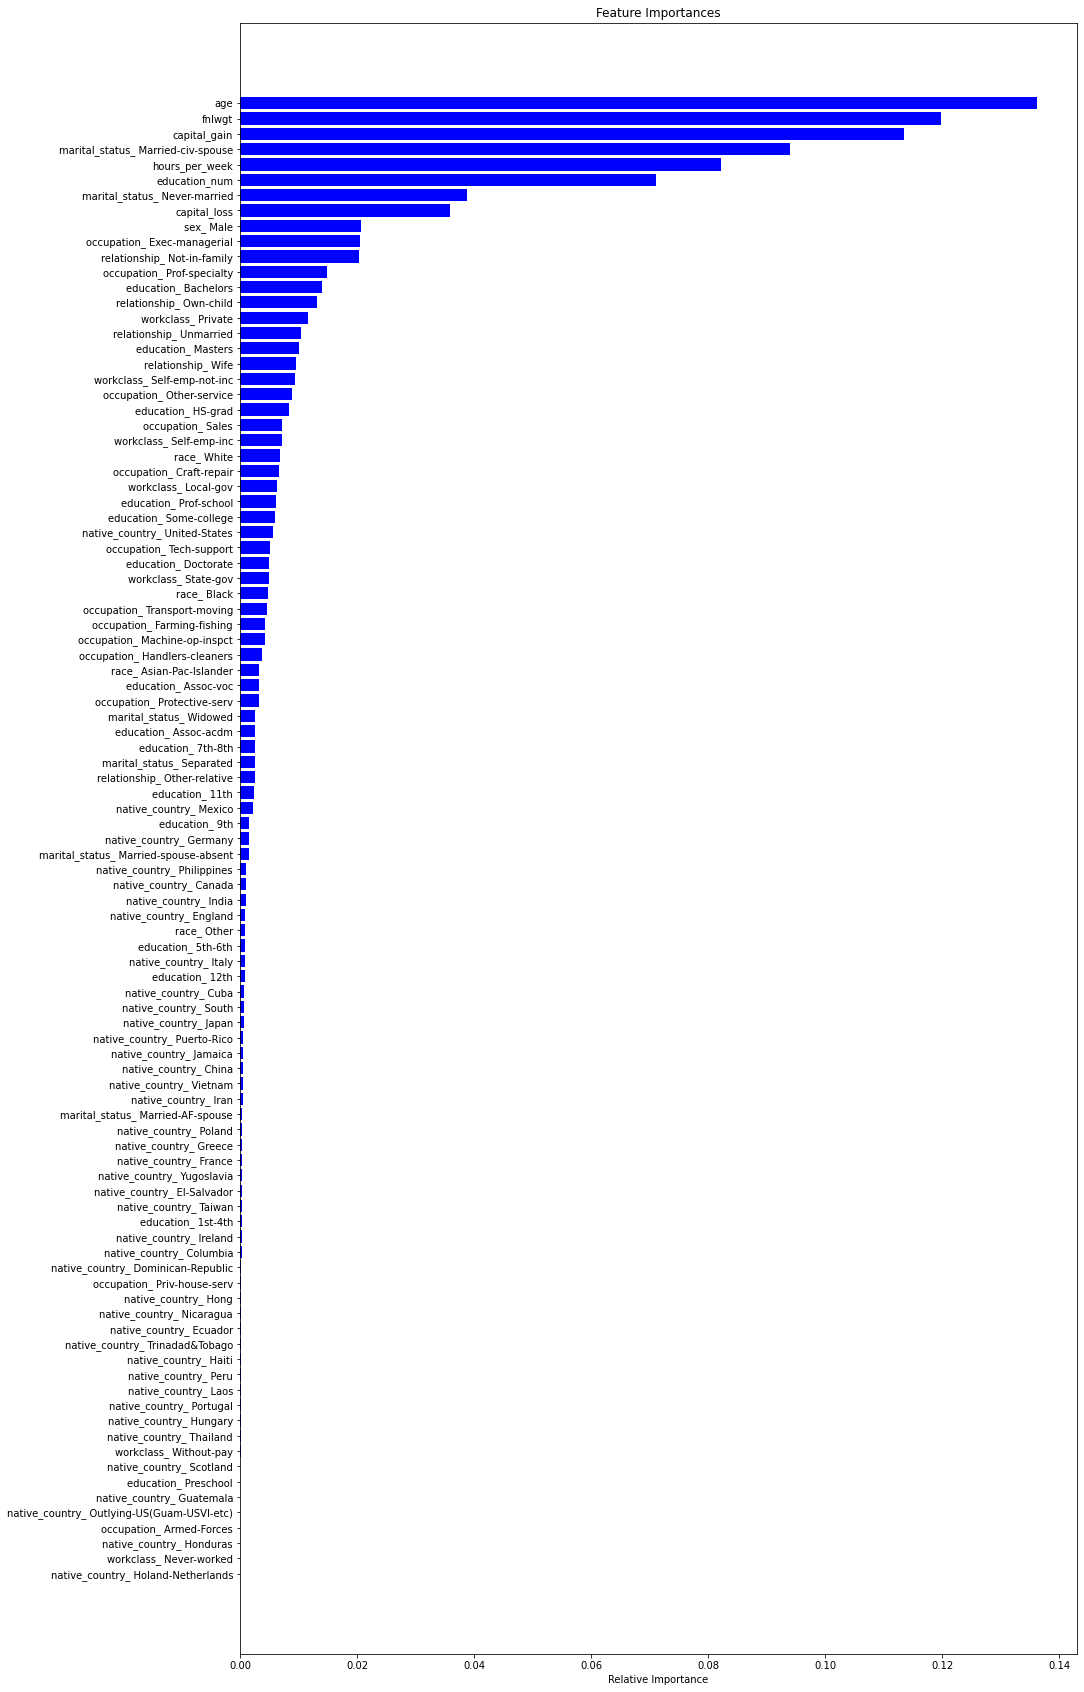

In [123]:
features = list(df_classification.drop('income_ >50K', axis=1).columns)
importances = rf_gini.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<span style="color:coral">
Some help i got for the plot:
https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
</span>

<span style="color:cyan">
We can see that for the tuned random forest have as top most important features: age, final weight, capital, marital status, hours per week and education number.
</span>